<a href="https://colab.research.google.com/github/papamichaelm/data-science/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF000','#00FF00','#0000FF'])
cmap_light = ListedColormap('#FFBBBB','#BBBBFF')

In [3]:
df_churn = pd.read_csv('/content/drive/MyDrive/Python/Data/Churn_Modelling.csv')
df_churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
# display the shape f the dataset
f'The shape of the dataset is: {df_churn.shape} (n_rows, n_columns)'

'The shape of the dataset is: (10000, 14) (n_rows, n_columns)'

In [5]:
# check for missing values and data types
summary_df = pd.DataFrame({
    'Number of Nulls': df_churn.isnull().sum(),
    'Data Type': df_churn.dtypes
})
summary_df

,Number of Nulls,Data Type
RowNumber,0,int64
CustomerId,0,int64
Surname,0,object
CreditScore,0,int64
Geography,0,object
Gender,0,object
Age,0,int64
Tenure,0,int64
Balance,0,float64
NumOfProducts,0,int64


In [6]:
# Drop irrelevant columns
df_churn = df_churn.drop(['RowNumber','CustomerId', 'Surname'], axis =1 )

In [7]:
df_churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df_churn['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
# encoding
df_churn = pd.get_dummies(df_churn, columns=['Geography'], drop_first=False)
df_churn[['Geography_France', 'Geography_Germany', 'Geography_Spain']] = df_churn[['Geography_France', 'Geography_Germany', 'Geography_Spain']].astype(int)
df_churn['Gender'] = df_churn['Gender'].map({'Male': 0, 'Female': 1})


In [10]:
df_churn.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
#Binary Cross Entropy
def cross_entropy(y, p_hat):

  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def sigmoid(h):
  return 1/(1+np.exp(-h))

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

# Normalise function
def normalise(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [12]:
class LogisticRegression():
  def __init__(self, thresh=0.5):
    self.thresh = thresh
    self.W = None
    self.b = None

  def fit(self, X, y, eta=1e-3, epochs= 1e3, show_curve=False):
    epochs = int(epochs)
    N, D= X.shape

    #Initialize Weights and Biases
    self.W = np.random.randn(D)
    self.b = np.random.randn(1)
    # Create zero valued container for J
    J = np.zeros(epochs)

    # SGD
    for epoch in range(epochs):
      p_hat = self.__forward__(X)
      J[epoch]=cross_entropy(y,p_hat)

      #Weight and bias Update Rules
      self.W-= eta*(1/N)*X.T@(p_hat-y)
      self.b-=eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel("epochs")
        plt.ylabel("$\mathcal{J}$")
        plt.title("Training Curve")

  def __forward__(self, X):
      return sigmoid(X@self.W+self.b)

  def predict(self, X):
      return (self.__forward__(X)>=self.thresh).astype(np.int32)

In [13]:
df_churn.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [14]:
# Define features and target
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
       ,'Geography_France', 'Geography_Germany', 'Geography_Spain']
target = 'Exited'

# Split ratio
train_ratio = 0.8

# create features and target arrays
y = df_churn[target].to_numpy()
X = df_churn[features].to_numpy()

X = normalise(X)
y= normalise(y)

# Shuffle the data
N = X.shape[0]
indices = np.random.permutation(N)

# Split the data
split_index = int(train_ratio * N)
train_indices = indices[:split_index]
test_indices = indices[split_index:]

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

In [15]:
# Fit the model
lrnn = LogisticRegression()
#lrnn.fit(X_train, y_train,eta=1e-3,epochs=1e6,show_curve=True)

eta:0.01,epoch:100000.0, acuracy:0.814375


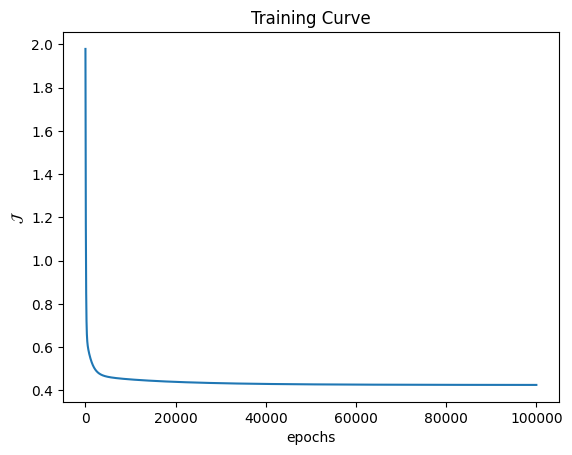

In [16]:
eta = [1e-2]
epochs = [1e5]
for et in eta:
  for ep in epochs:
    lrnn.fit(X_train, y_train,eta=et,epochs=ep,show_curve=True)
    y_hat_train = lrnn.predict(X_train)
    print(f'eta:{et},epoch:{ep}, acuracy:{accuracy(y_train,y_hat_train)}')

In [18]:
def calculate_metrics(y_true, y_pred):

    # True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Accuracy
    accuracy = (TP + TN) / len(y_true)

    # Precision: Avoid division by zero
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Recall: Avoid division by zero
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # F1 Score: Avoid division by zero
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    matrix = np.array([[TN, FP], [FN, TP]])

    return accuracy, precision, recall, f1_score,matrix



accuracy, precision, recall, f1_score, matrix = calculate_metrics(y_test, y_hat_test)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.8055
Precision: 0.6733333333333333
Recall: 0.2290249433106576
F1 Score: 0.34179357021996615


In [19]:


matrix

array([[1510,   49],
       [ 340,  101]])